In [1]:
from autolens.data.imaging import image as im
from autolens.data.array import mask as ma
from autolens.lensing import lensing_fitting
from autolens.lensing import ray_tracing
from autolens.model.galaxy import galaxy as g
from autolens.lensing import lensing_image as li
from autolens.model.profiles import light_profiles as lp
from autolens.model.profiles import mass_profiles as mp
from autolens.data.imaging.plotters import imaging_plotters
from autolens.model.profiles.plotters import profile_plotters
from autolens.model.galaxy.plotters import galaxy_plotters
from autolens.lensing.plotters import plane_plotters
from autolens.lensing.plotters import ray_tracing_plotters

# In this chapter, you've learnt how create and fit strong lenses with PyAutoLens. In particular, you've learnt:

# 1) PyAutoLens uses Cartesian grids of (y,x) coordinates to perform ray-tracing.
# 2) These grids are combined with light and mass profiles to compute images, surface-densities, potentials and
#    deflection angles.
# 3) Profiles are combined to make galaxies.
# 4) Collections of galaxies (at the same redshift) form a plane.
# 5) A tracer can make an image-plane + source-plane strong lens system.
# 6) The Universe's cosmology can be input into this tracer to convert units to physical values.
# 7) The tracer's image-plane image can be used to simulate strong lens imaging observed on a real telescope.
# 8) That this image can be fitted, so to as quantify how well a model strong lens system represents the observed image.

In [2]:
# In this summary, we'll consider how flexible the tools PyAutoLens gives you are to study every aspect of a strong
# lens system. Lets get a 'fit' to a strong lens, by setting up an image, mask, tracer, etc.

# If you are using Docker, the path you should use to output these images is (e.g. comment out this line)
# path = '/home/user/workspace/howtolens/chapter_1_introduction'

# If you arn't using docker, you need to change the path below to the chapter 2 directory and uncomment it
# path = '/path/to/user/workspace/howtolens/chapter_1_introduction'

image = im.load_imaging_from_fits(image_path=path + '/data/image.fits',
                                  noise_map_path=path+'/data/noise_map.fits',
                                  psf_path=path + '/data/psf.fits', pixel_scale=0.1)
mask = ma.Mask.circular(shape=image.shape, pixel_scale=image.pixel_scale, radius_mask_arcsec=3.0)
lensing_image = li.LensingImage(image=image, mask=mask)
lens_galaxy = g.Galaxy(mass=mp.EllipticalIsothermal(centre=(0.0, 0.0), einstein_radius=1.6, axis_ratio=0.7, phi=45.0))
source_galaxy = g.Galaxy(bulge=lp.EllipticalSersic(centre=(0.1, 0.1), axis_ratio=0.8, phi=45.0,
                                                  intensity=1.0, effective_radius=1.0, sersic_index=4.0),
                         disk=lp.EllipticalSersic(centre=(0.1, 0.1), axis_ratio=0.8, phi=45.0,
                                                  intensity=1.0, effective_radius=1.0, sersic_index=1.0))
tracer = ray_tracing.TracerImageSourcePlanes(lens_galaxies=[lens_galaxy], source_galaxies=[source_galaxy],
                                             image_plane_grids=[lensing_image.grids])
fit = lensing_fitting.fit_lensing_image_with_tracer(lensing_image=lensing_image, tracer=tracer)

In [3]:
# The fit contains our tracer, which contains our planes, which contain our grids and galaxies, which contain our 
# profiles:
print(fit)
print()
print(fit.tracer)
print()
print(fit.tracer.image_plane)
print()
print(fit.tracer.source_plane)
print()
print(fit.tracer.image_plane.galaxies[0])
print()
print(fit.tracer.source_plane.galaxies[0])
print()
print(fit.tracer.image_plane.galaxies[0].mass)
print()
print(fit.tracer.source_plane.galaxies[0].bulge)
print()
print(fit.tracer.source_plane.galaxies[0].disk)
print()





Redshift: None
Mass Profiles:
EllipticalIsothermal
centre: (0.0, 0.0)
axis_ratio: 0.7
phi: 45.0
einstein_radius: 1.6
slope: 2.0
core_radius: 0.0

Redshift: None
Light Profiles:
EllipticalSersic
centre: (0.1, 0.1)
axis_ratio: 0.8
phi: 45.0
intensity: 1.0
effective_radius: 1.0
sersic_index: 4.0
EllipticalSersic
centre: (0.1, 0.1)
axis_ratio: 0.8
phi: 45.0
intensity: 1.0
effective_radius: 1.0
sersic_index: 1.0

EllipticalIsothermal
centre: (0.0, 0.0)
axis_ratio: 0.7
phi: 45.0
einstein_radius: 1.6
slope: 2.0
core_radius: 0.0

EllipticalSersic
centre: (0.1, 0.1)
axis_ratio: 0.8
phi: 45.0
intensity: 1.0
effective_radius: 1.0
sersic_index: 4.0

EllipticalSersic
centre: (0.1, 0.1)
axis_ratio: 0.8
phi: 45.0
intensity: 1.0
effective_radius: 1.0
sersic_index: 1.0



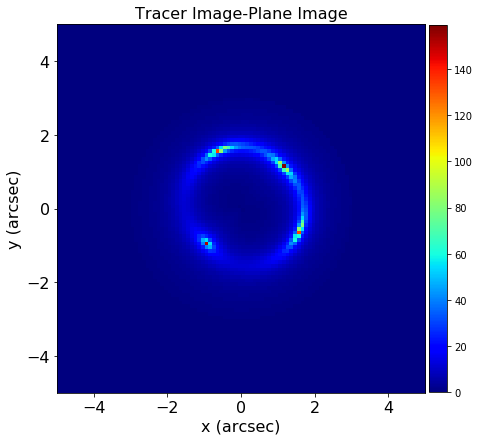

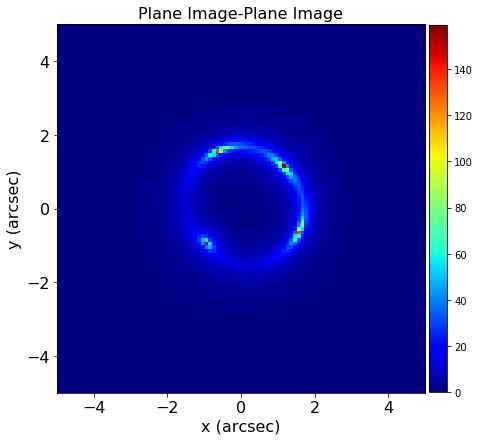

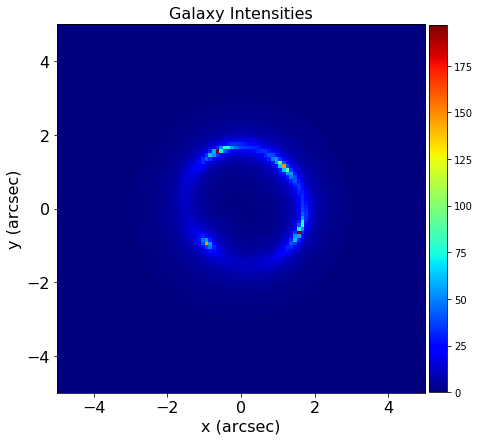

In [5]:
# Using the plotters we've used throughout this chapter, we can visualize any aspect of a fit we're interested
# in. For example, if we want to plot the image of the source galaxy mass profile, we can do this in a variety of
# different ways
ray_tracing_plotters.plot_image_plane_image(tracer=fit.tracer)
plane_plotters.plot_image_plane_image(plane=fit.tracer.source_plane)
galaxy_plotters.plot_intensities(galaxy=fit.tracer.source_plane.galaxies[0], grid=fit.tracer.source_plane.grids[0].regular)

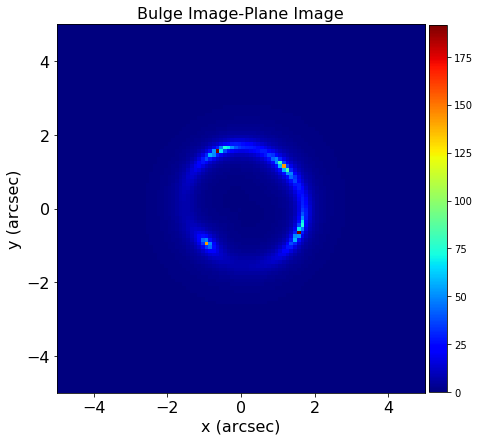

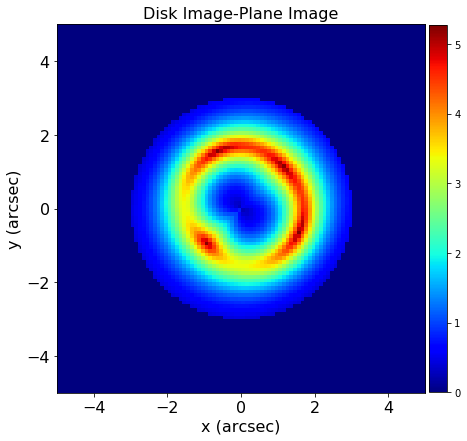

In [6]:
# However, as our fit and ray-tracing becomes more complex, it is useful to know how to decompose their different
# attributes to extract different things about them. For example, we made our source-galaxy above with two light 
# profiles, a 'bulge' and 'disk. We can plot the image-plane image of each component individually, if we know how to
# break-up the different components of the fit and tracer.
profile_plotters.plot_intensities(light_profile=fit.tracer.source_plane.galaxies[0].bulge,
                                  grid=fit.tracer.source_plane.grids[0].regular, title='Bulge Image-Plane Image')
profile_plotters.plot_intensities(light_profile=fit.tracer.source_plane.galaxies[0].disk,
                                  grid=fit.tracer.source_plane.grids[0].regular, title='Disk Image-Plane Image')

In [7]:
# The fit also has the lensing image, so we can plot the image using the fit too, if we so desire
imaging_plotters.plot_image_subplot(image=lensing_image.image)

NoSectionError: No section: 'output'

In [7]:
# And, we're done, not just with the tutorial, but the chapter!

# To end, I want to quickly talk about code-design and structure. Yeah, I know, as a scientist, you don't like code
# and certaintly don't want to think about code! However, the point is, with PyAutoLens, you don't need to!

# Think about it - throughout this chapter, we never talk about anything like it was code. We didn't refer to
# 'variables', 'parameters' and 'functions' did we? Instead, we talked about 'galaxies', 'planes' and a 'tracer'. These
# are the things that, as scientists, we use to visualize a strong lens system.

# Software that abstracts the underlying code in this way follows what is called an 'object-oriented design', and it is
# our hope with PyAutoLens that we've made the way you use it (that is, in coding speak, its 'interface') intuitive.

# However, if you do enjoy code, variables, functions, and parameters, you're probably ready to take a look at the
# PyAutoLens source-code. This can be found in the 'autolens' folder. At team PyAutoLens, we take a lot of pride
# in our source-code, so I can promise you its well written, well documented and thoroughly tested (check out the
# 'test' directory if you're curious how to test code well!).

# Okay, enough self-serving praise for PyAutoLens, lets wrap up the chapter. You've learn a lot in this chapter, but
# what you haven't learnt is how to 'model' a real strong gravitational lens.

# In the real world, we've no idea what the 'correct' set of light and mass profile parameters are that will give a
# good fit to a lens. Lens modeling is the process of finding the lens model which provides the best-fit, and that will
# be the focus of our next set of tutorials.